In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('dark_background')

#### Task 1. About conceit.

An infinite number of Mekhmat students stand in a row. The self-importance of each student is equal to the distance (in students) to the nearest taller person in front of him. Find the average conceit of the students.

Solution.

In order to assess the average self-esteem of students, it is necessary to form some idea of ​​the growth of Mekhmat students in the general population (infinite series).

Since N (number of students) tends to infinity, we apply the resampling method (bootstrap) and infer the average self-importance based on sample data on the height of students.

Calculation prerequisites:
1. Age of Mekhmat students in the general population - from 18 years;
2. Students of Mekhmat are both boys and girls. At the same time, the proportion of young men is larger;
3. Suppose that the average height of students is slightly higher than the average for Russia (because the proportion of boys is larger) and is 175 cm, and the standard deviation is 8 cm;
4. Let growth be a continuous value and correspond to a normal distribution.

Let us generate a general population of Mekhmat students with parameters corresponding to the prerequisites.

In [ ]:
students = np.random.normal(175, 8, size=100000)

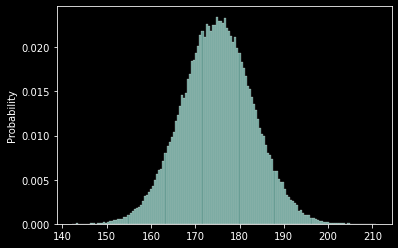

In [ ]:
sns.histplot(students, stat='probability')

Below is a function to calculate the distance (in number of students) to the nearest taller student. At the same time, for the tallest and last student in the sample, such a distance is 0 (because "to the nearest taller student in front of him" is the condition of the problem).

The input function receives an integer type number that corresponds to the sample size.

In [ ]:
def stud_opinion(sample_size):
  
  smpl = pd.Series(students).sample(sample_size, replace=True, ignore_index=True)
  res = []
  for index in range(1, len(smpl)):
    value = smpl.iloc[index-1,]
    df = smpl.iloc[index:,]
    for sub_value in df:
      if round(sub_value,1) >= round(value,1):
        res.append(df.index[df.tolist().index(sub_value)] - \
                   smpl.index[smpl.tolist().index(value)])
        break
  if len(res) != len(smpl):
    res.extend((len(smpl) - len(res)) * [0])
  return pd.Series(res).mean()

Let's run n thousand experiments with a sample size equal to sample_size and calculate the average distance to the nearest taller student.

In [ ]:
n = 10000
sample_size = 100
fin_res = []

for _ in tqdm_notebook(range(n)):
  fin_res.append(stud_opinion(sample_size))
pd.Series(fin_res).mean()

  0%|          | 0/10000 [00:00<?, ?it/s]

3.2371640000000026

In this experiment, the desired average distance is sensitive to sample size (the larger the sample, the greater the likelihood of outliers).

Let us prove that as the sample size increases, the average distance (conceit) also increases. To do this, we will change the sample size from 10 to 300 in increments of 10 and will run n experiments for each sample size.

P.S. The running time of the algorithm is about 10 minutes. To reduce the execution time, it is necessary to decrease n.

In [ ]:
n = 1000
smpl_size = []
mean = []
std = []
sqrt_n = []

for sample_size in tqdm_notebook(range(10,310,10)):
  smpl_size.append(sample_size)
  sqrt_n.append(np.sqrt(sample_size))
  temp = []
  for _ in range(n):
    temp.append(stud_opinion(sample_size))
  mean.append(pd.Series(temp).mean())
  std.append(pd.Series(temp).std())

  0%|          | 0/30 [00:00<?, ?it/s]

In the final table, we also calculate the standard error. Standard error = s/sqrt(n), where s is the standard deviation of sample values, sqrt(n) is sq. the root of the sample size.

In [ ]:
df = pd.DataFrame()
df['sample_size'] = smpl_size
df['mean'] = mean
df['std'] = std
df['sqrt_n'] = sqrt_n
df['se'] = df['std'] / df['sqrt_n']
df.head()

,sample_size,mean,std,sqrt_n,se
0,10,1.236700,0.452999,3.162278,0.143251
1,20,1.763150,0.495050,4.472136,0.110697
2,30,2.096633,0.482676,5.477226,0.088124
3,40,2.380050,0.513189,6.324555,0.081142
4,50,2.605240,0.543546,7.071068,0.076869


Let's graphically display the dependence of the average distance to the nearest higher student (conceit) on the sample size.

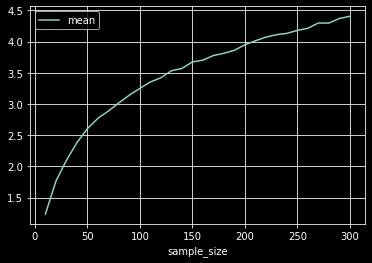

In [ ]:
df.plot(x='sample_size', y='mean', grid=True)

We show graphically that the standard error decreases with increasing sample size.

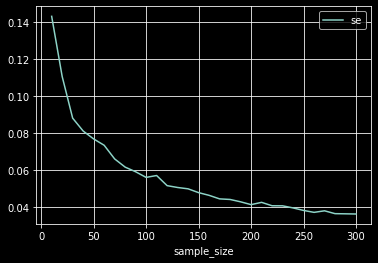

In [ ]:
df.plot(x='sample_size', y='se', grid=True)

#### Task 5. The problem of crossing a glass bridge.

Evaluate statistically how the interaction of players affected the number of participants who successfully completed the bridge in comparison with the strategy of "randomly guessing by each participant".

Solution.

The game involves 16 people. The bridge consists of 18 paired steps. In the pair stage, only one tile can support a competitor.

Thus, the probability of a participant passing one stage is 0.5. Let's simulate a strategy of "random guessing" (assume that the players following the leader remember correctly guessed tiles) for 100,000 options for passing the bridge.

In [ ]:
k = 100000
result_coin = []
result_players = []

for _ in tqdm_notebook(range(k)):
  players = 16
  steps = 18
  coins = []
  plrs = []
  for _ in range(1, 19):
    coin = np.random.binomial(1, 0.5)
    if coin == 0:
      players -= 1
      steps -= 1
    else:
      steps -= 1
    coins.append(coin)
    plrs.append(players)
  result_coin.append(pd.Series(coins).mean())
  result_players.append(plrs[-1])

  0%|          | 0/100000 [00:00<?, ?it/s]

Let's make sure that the average probability is 0.5:

In [ ]:
pd.Series(result_coin).mean()

0.5003338888888907

Average number of participants passing the bridge:

In [ ]:
pd.Series(result_players).mean()

7.00601

Conclusion:

In the series, the glass bridge game was won by three contestants. If the above calculations are correct, then the interaction of the players had a negative impact on the passage of the game.